# Homework 1

## Due date: January 26 2025, 11.59 pm

## Yoshihiro Shirai

## Instructions
Submit this notebook on Canvas with your answer to each questions, including your code. Run the notebook and submit also an html version of the notebook. 

## Question 1

- The inspiration for this problem and the data itself is from Prof. Haugh's Quantitative Risk Management course (IEOR E4602) taught at Columbia University in 2016.

- Consider the options data in the OptionsPivotTables.xls Excel workbook.
- We want to consider joint stresses of the underlying security price and implied volatility. 
- In particular, we want to consider shifting the underlying security by -20\%, -10\%, -5\%, 0\%, +5\%, +10\% and +20\%, and shifting the implied volatility by -5, -2, 0, +2, +5, +10 and +20 volatility points. We therefore have a total of 7 × 7 = 49 scenarios.

- **Write a Python program that takes all the options data in the OptionsData worksheet, computes the P&L for each option under each scenario and outputs the results to the same
spreadsheet beginning at column AR.**

### Solution

- First, we count the number of assets in our portfolio. This value is saved as ``NumPosition``.

In [1]:
from openpyxl import load_workbook
from openpyxl.styles import Alignment

import os
base_path = os.path.dirname(os.getcwd()) 
file_path = os.path.join(base_path,'H1 Solution','OptionsPivotTables.xlsm')

wb = load_workbook(filename=file_path, read_only=False, keep_vba=True)

ws = wb['OptionsData']  # or wb.active

r = 5
row = ws[r][1].value
NumPosition = 0
while row is not None:
    NumPosition += 1
    r += 1
    row = ws[r][0].value

print(NumPosition)


83


- Next, we loop over each portfolio component, and insert the appropriate formula for the variation in the option price starting from cell AR5 in the OptionData worksheet.

In [2]:
# Define a lambda function to get Excel worksheet column letter from number
excel_col_name = lambda n: '' if n <= 0 else excel_col_name((n - 1) // 26) + chr((n - 1) % 26 + ord('A'))
excel_col_num = lambda a: 0 if a == '' else 1 + ord(a[-1]) - ord('A') + 26 * excel_col_num(a[:-1]) # This is to convert back to number

# Define scenarios
S = list([0.8,0.9,0.95,1,1.05,1.1,1.2])
V = list([-0.05,-0.02,0,0.02,0.05,0.1,0.2])
scenarios = [(s,v) for s in S for v in V] # list comprehension to get all scenarios as combinations of underlying and implied volatility scenarios

# Define header of scenario table and adjust column width
c = excel_col_num("AR")
for (s,v) in scenarios:
    ss = str(s)
    vv = str(v)
    ws[excel_col_name(c)+str(4)].value = f"Und {round((s-1)*100)}%, ImpVol {round(100*v)}%"
    ws.column_dimensions[excel_col_name(c)].width = 19*1.23
    ws[excel_col_name(c)+str(4)].alignment = Alignment(horizontal='center')
    c += 1


# Loop through all scenarios and fill up table with value change
for r in range(5,NumPosition):
    c = excel_col_num("AR")
    for (s,v) in scenarios:
        ss = str(s)
        vv = str(v)
        fun = f"=(BSPrice($B{r}*{s},$J{r}+{v}, $K{r}, $C{r}, ($I{r}-$B$1)/365, $G{r}, $H{r}, $D{r}) - BSPrice($B{r},$J{r}, $K{r}, $C{r}, ($I{r}-$B$1)/365, $G{r}, $H{r}, $D{r})) * $F{r}"
        ws[excel_col_name(c)+str(r)].value = fun
        ws[excel_col_name(c)+str(r)].alignment = Alignment(horizontal='center')
        ws[excel_col_name(c)+str(r)].number_format = '0'
        c += 1

# Save file                                                       
wb.save(file_path)

- Finally, check the workbook

In [3]:
import os
os.system('start "excel" ' + '"' + file_path + '"')

0

## Question 2

- Once the P&L’s from the 49 scenarios have been calculated and written to the OptionsData worksheet, create a pivot-table that can display the P&L from one of these scenarios as a function of strike (rows), maturity (columns) and underlying security (page or filter).
- Create additional pivot tables for appropriate delta, gamma, vega, volga and vanna numbers. Check to see if the numbers in these pivot tables are consistent with the pivot table in (a) when the underlying security is shifted by -10% and the implied volatilities increase by +10 volatility points.
- Suppose you want to create a pivot-table to view the P&L data as a function of the shift in the underlying (rows), the shift in the implied volatilities (columns) and the underlying security (page
or filter). Is it possible to do this given the way we have organized the data in the OptionsData worksheet? If yes, do it. If not, explain briefly what design changes you would need to have made in Question 1 so that it would be possible to create such a pivot-table.

### Solution

- This question can be done directly in Excel. 
- For the second bullet point, make sure to check the vba code for the functions BSVanna and BSVolga to understand what they need to be multiplied by in order to get the correct second order terms in the approximation.
- The pivot table in the third part cannot be created. The original table should be modified so that a new column contains the scenarios for the underlying. The P&L table constructed in question 1 only contains volatility scenarios (except now there are more rows). Then, underlying scenarios can be used for rows in the pivot table.

## Question 3

- Do you think parallel shifts in the volatility surface represent reasonable scenarios? Can you think of a better set of scenarios for representing shifts in the implied volatility surface? Put another
way, suppose a crisis occurs tomorrow and all implied volatilities increase. Do you think near-term volatilities will increase more or less than long-term implied volatilities? (This question is designed
to show that designing realistic scenario should be based on risk factors movements during crisis.) 

- Suppose an options portfolio is delta, gamma, vega and vanna neutral. Suppose also that the options portfolio is designed to be very short skew, that is the portfolio will benefit if the skew flattens.  Do you think scenarios involving shifts in the underlying security and implied volatility surface will reveal the full risk in the portfolio? Explain your answer. What sort of additional scenarios might
you want to include? What issues arise when designing these additional scenarios? (This question should impress on you the importance of considering the trading strategy / portfolio composition
when designing scenarios. A more basic example occurs if you consider a market-neutral portfolio of stocks. Then just shifting the underlying securities by uniform amounts will not reveal any risk in
the portfolio. Likewise, a fixed income portfolio that has a zero duration will reveal very little risk if it is only subjected to stresses based on parallel shifts in the yield curve. Such a portfolio might still be very risky if, for example, it is exposed to changes in the slope of the yield curve or other risk factors.)

### Solution

- Parallel shifts do not represent reasonable scenarios. If a crisis occurs tomorrow, it is more likely to affect short term options rather than longer term ones, as there will be longer time to recover for options with longer maturities. In fact, it is possible to show that parallel shifts are not arbitrage free under reasonable assumptions on the volatility surface. That is, a parallel shifts must always be accompanied by a change in the skew.

- It is not possible for scenarios only involving shifts in the undelyier and/or the vol surface to fully reveal the risks in the portfolio. This is because a steepening of the vol surface, which implies a loss in the portfolio, cannot be captured by such scenarios.

# Question 4

- Compute the VaR and Expected-Shortfall (ES) for (i) the normal distribution with mean $\mu = 0$ and standard deviation $\sigma = 0.3 × 10000/\sqrt{250}$ and (ii) the $t_4$ distribution with the same values of $\mu$ and $\sigma$. (Note that if we assume that the horizon is $\Delta = 1$ day, then a value of $\sigma = .3/\sqrt{250}$ corresponds to an annual volatility of approx $30\%$. The value of 250 corresponds to the fact that there are approx. 250 trading days in a calendar year. The multiplier of 10000 is there simply to make the numbers more readable.) You should compute the VaR and ES for the following values of α: $$\begin{align*}0.90, 0.95, 0.975, 0.99, 0.995, 0.999, 0.9999, 0.99999, 0.999999.\end{align*}$$

- What do you notice? Now compute the ES to VaR ratio for each value of α. Report all your results in a table.

### Solution

In [4]:
import math
import scipy.stats as st
mu = 0
sigma = 0.3*10000/math.sqrt(250)
nu = 4
alpha = [0.9,0.95,0.975,0.99,0.995,0.999,0.9999,0.99999,0.999999]
alpha_c = [1-aa for aa in alpha]
var = dict()
ES = dict()
var["norm"] = mu + sigma * st.norm.ppf(alpha)
ES["norm"] = mu + sigma * st.norm.pdf(st.norm.ppf(alpha))/alpha_c
var["t4"] = mu + sigma * st.t.ppf(alpha,nu)
ES["t4"] = mu + sigma * (st.t.pdf(st.t.ppf(alpha,nu),nu)/alpha_c) * ( (nu+st.t.ppf(alpha,nu)**2) / (nu-1) )

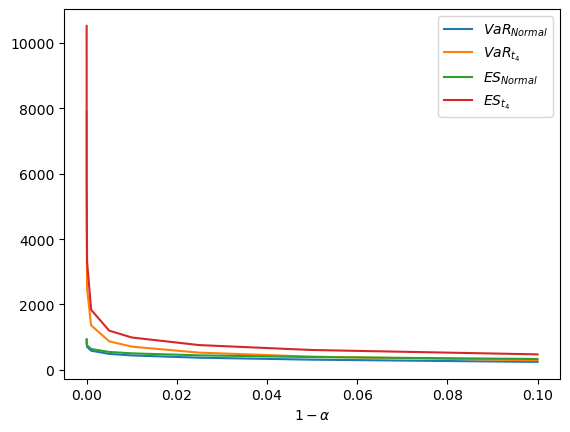

In [5]:
import matplotlib.pyplot as plt

ax = plt.gca()  # or any other way to get an axis object
ax.plot(alpha_c, var["norm"], label=r'$VaR_{Normal}$')
ax.plot(alpha_c, var["t4"], label=r'$VaR_{t_4}$')
ax.plot(alpha_c, ES["norm"], label=r'$ES_{Normal}$')
ax.plot(alpha_c, ES["t4"], label=r'$ES_{t_4}$')
plt.xlabel(r'$1-\alpha$')
ax.legend()

We observe that:
- Expected shortfall higher than VaR
- ES and VaR for normal lower than for t4

Next, we compute the ES to VaR ratio.

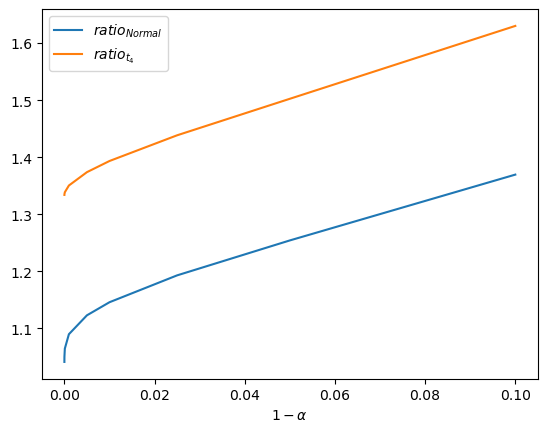

In [6]:
ratio = dict()
ratio["norm"]= ES["norm"]/var["norm"]
ratio["t4"]= ES["t4"]/var["t4"]

ax = plt.gca()  # or any other way to get an axis object
ax.plot(alpha_c, ratio["norm"], label=r'$ratio_{Normal}$')
ax.plot(alpha_c, ratio["t4"], label=r'$ratio_{t_4}$')
plt.xlabel(r'$1-\alpha$')
ax.legend()


Observe that the ratio for the $t_4$ distribution converges to $1.33\approx \frac{\nu}{\nu-1}=\frac{4}{3}$, while the normal ratio converges to $1$. This is consistent with the results seen in class.

## Question 5

This question is based on material from Sections 19.2 and 19.3 of Ruppert and Matteson’s Statistics and Data Analysis for Financial Engineering. (Feel free to look at those sections but you should try and figure out the details yourself rather than just coping the code there.) First install R’s Ecdat package from CRAN and then load the package by including the line “library(Ecdat)” at the beginning of your R session, script or function. We will be using the SP500 dataframe from the Ecdat package. This dataframe contains returns on the S&P500 index between 1981 and 1991. 

- Suppose you hold a 1m position in the S&P500. Use the return data in the SP500 dataframe to estimate the 95% VaR and expected shortfall (ES) of your position.
-  Use R’s fitdistr function to fit a t-distribution to the return data. Now use this fitted distribution to again estimate the 95% VaR and ES of your position. Compare your answer to your answer from part 1.

### Solution

This problem can be done in R. 

```
#Restart session
rm(list = ls())
shell("cls")

## Load libraries and data
library("Ecdat") # recall to run install.packages("Ecdat")
data("SP500")
x <- SP500
pi0 <- 1000000
pi <- cumprod(1 + x / 100)
loss <- -pi[2:2780] + pi[1:2779]

## VaR by Historical Simulation
loss_sorted <- sort(loss)
loss_cdf <- seq_along(loss_sorted) / length(loss_sorted)
alpha <- 0.95
var_hs <- pi0 * loss_sorted[which(loss_cdf >= alpha)[1]]
var_hs

## VaR by fitting t distribution
library("MASS")
library(qrmtools)
start <- list(m = mean(loss), s = sd(loss), df = 5) #Parameters guess
lower <- c(mean(loss), sd(loss), 3) #Lower bound to the parameters
dt <- fitdistr(loss, "t", start = start, lower = lower)
estimate <- c(dt$estimate)
var_t <- estimate[1] * pi0 +
  pi0 * VaR_t(alpha, scale = estimate[2], df = estimate[3])
var_t
```

- Note that the VaR for the fitted t distribution is higher 
- This is because the empirical distribution is capped by the maximum value observed.

Further observations
- Confidence interval for the VaR may be obtained by bootstrap methods. For instance, M estimators may be constructed each based on sampling with replacement N returns from the dataset. The 95%-interquantile range provides then a good idea of the uncertainty in the VaR. 
- Similarly, one can use bootstrap to predict uncertainty around the parameter estimate in part b.
- Finally, time series methods may be used to estimate the conditional loss distribution VaR. This generally means fitting a time series model to the distribution of return, and then estimate VaR based on it.